# ТЕМА: Рынок заведений общественного питания Москвы

## Цель:
**Исследовать рынок общественного питания Москвы, для определения перспективных параметров открытия кафе.**

## Задачи:
- **1. Установить количественное соотношение типов объектов общественного питания Москвы (далее - ООП).**
- **2. Установить количественное соотношение сетевых и несетевых ООП.**
- **3. Установить характерный для сетевого распространения тип ООП.**
- **4. Установить характерные для сетевого распространения число и вместимость (число посадочных мест) ООП.**
- **5. Установить среднюю вместимость для каждого типа ООП.**
- **6. Установить Топ-10 улиц по плотности расположения ООП.**
- **7. Установить число улиц с одним ООП, определить в каких районах Москвы.**
- **8. Установить вместимость ООП на улицах с большим количеством ООП.**
- **9. Определить оптимальные для открытия нового заведения: тип ООП, вместимость, район расположения. Определить перспективы развития сети.**
- **10. Подготовить презентацию для партнеров и инвесторов.**

**ПАРАМЕТРЫ:**
- тип ООП
- количество посадочных мест
- район расположения
- возможности развития сети

## Объект исследования: 
- **Открытые данные о заведениях ООП в Москве.**

*Дополнительная информация:*  рассматривается вопрос об открытии нестандартного роботизированного кафе, требуются инвестиции.

## 1. Изучение данных из файлов

### 1.1. Импортирование библиотек

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from io import BytesIO
import requests
import plotly.express as px
from plotly import graph_objects as go

### 1.2. Загрузка данных

In [2]:
# Прочитаем данные
df = pd.read_csv('/datasets/rest_data.csv')

### 1.3. Предварительное изучение данных

In [3]:
#Вызовем таблицу при помощи display, посмотрим первые и последние 5 строк
display(df)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


In [4]:
#Вызовем 10 строк таблицы случайным образом
df.sample(n=10, random_state=0)

,id,object_name,chain,object_type,address,number
13144,196055,Ресторан «Big»,нет,ресторан,"город Москва, проектируемый проезд № 4062, дом 6, строение 8",320
7890,20557,Караоке-клуб,нет,кафе,"город Москва, улица Земляной Вал, дом 58",60
15028,215653,Сказка Бутово,нет,ресторан,"город Москва, Изюмская улица, дом 52А",50
10402,184143,Кафе Black Code,нет,кафе,"город Москва, Садовническая улица, дом 42, строение 1",15
9792,170035,Дабл Би блэк,да,кафе,"город Москва, Якиманская набережная, дом 2",40
4750,150834,ГБОУ Школа №1468,нет,столовая,"город Москва, Волгоградский проспект, дом 11, корпус 2",0
6878,20751,Кенди чоп,нет,предприятие быстрого обслуживания,"город Москва, Планерная улица, дом 7",10
4269,68315,Кофе Хаус,да,кафе,"город Москва, проспект Мира, дом 42",60
14462,216767,КАФЕ,нет,кафе,"город Москва, 80-й километр Московской Кольцевой Автодороги, дом 4, строение 1",20
8548,77748,Глория,нет,ресторан,"город Москва, поселение Московский, посёлок Ульяновского Лесопарка, владение 6",48


In [5]:
# Проверим наличие и количество дубликатов
df.duplicated().sum()

0

In [6]:
# Проверим наличие и количество дубликатов по наименованию ООП и адресу его расположения
df.duplicated(subset=['object_name','address'], keep='last').sum()

207

In [7]:
# Вызовем общую информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


**В таблице 15 366 строк и 6 столбцов. Типы данных у столбцов: int64, object. Наименования столбцов корректны. Пропусков нет. Дубликатов по всем столбцам нет (предварительно), однако имеется 207 дубликатов по двум столбцам: наименование ООП и адрес его расположения.**

**Столбцы содержат следующую информацию:**
-	**id** — идентификатор объекта;
-	**object_name** — название объекта общественного питания;
-	**chain** — сетевой ресторан;
-	**object_type** — тип объекта общественного питания;
-	**address** — адрес;
-	**number** — количество посадочных мест


In [8]:
# Посмотрим дополнительно на число уникальных значений в столбце с id
df['id'].nunique()

15366

In [9]:
# Посмотрим дополнительно на число уникальных значений в столбце с названием ООП
df['object_name'].nunique()

10393

In [10]:
# Посмотрим дополнительно на уникальные значения в столбце сетевой/несетевой 
df['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [11]:
# Посмотрим дополнительно на уникальные значения в столбце с типом ООП 
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [12]:
# Посмотрим дополнительно на число уникальных значений в столбце с адресом
df['address'].nunique()

9108

In [13]:
# Подробнее посмотрим на вместимость
df['number'].min()

0

In [14]:
# Посмотрим, сколько ООП не имеет посадочных мест
n = df[df['number'] == 0].count()
n

id             1621
object_name    1621
chain          1621
object_type    1621
address        1621
number         1621
dtype: int64

In [15]:
df['number'].max()

1700

**Число уникальных ID ООП равно числу строк, казалось бы, ООП не повторяются. Однако, дубликаты по наименованию ООП и адресу его местоположения говорят об обратном, возможно, одно и тоже ООП было зарегистрировано неоднократно - отсюда разные ID. Уникальных значений названий ООП меньше, чем общее число строк - какие-то сетевые ООП называются одинаково, какие-то входят в дубли по наименованию и адресу.**

**Названия ООП записаны кириллицей и латиницей, регистр разный, на первый взгляд названия выглядят корректно.**

**В столбце сетевой/несетевой ООП значения "да" и "нет" - корректны.**

**В столбце с типом ООП 9 уникальных типов, их названия в нижнем регистре - данные корректны.**

**В столбце с адресом 9108 уникальных значений, адреса на первый взгляд выглядят корректно, записаны кириллицей, регистр разный.**

**Число посадочных мест в ООП - от 0 до 1700, ООП без посадочных мест (скорее всего - кулинарии в магазинах) - 1621 ед.**

## 2. Подготовка данных

**В целом, данные выглядят корректными. Однако необходимо удалить дубликаты по двум столбцам: наименование ООП и его адрес.**

In [16]:
df.drop_duplicates(subset=['object_name','address'], keep='last', inplace=True)

In [17]:
# Проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15159 entries, 0 to 15365
Data columns (total 6 columns):
id             15159 non-null int64
object_name    15159 non-null object
chain          15159 non-null object
object_type    15159 non-null object
address        15159 non-null object
number         15159 non-null int64
dtypes: int64(2), object(4)
memory usage: 829.0+ KB


In [18]:
# Повторно посмотрим дополнительно на число уникальных значений в столбце с названием ООП
df['object_name'].nunique()

10393

In [19]:
df['object_name'].value_counts()

Столовая                                      266
Шаурма                                        224
Кафе                                          201
KFC                                           152
Шоколадница                                   140
                                             ... 
Диссидент                                       1
Кафе «Кулинарная лавка братьев Караваевых»      1
Грузинские Каникулы                             1
Баракат                                         1
кафе «Ля Ферм»                                  1
Name: object_name, Length: 10393, dtype: int64

In [20]:
# Повторно посмотрим дополнительно на число уникальных значений в столбце с адресом
df['address'].nunique()

9108

**Удалили 207 дублей по наименованию ООП и его адресу, число уникальных значений по обеим столбцам не изменились.**

**Чтобы полностью убедиться в отсутствии дубликатов, приведем названия ООП и адреса к единому стилю - к нижнему регистру, уберем кавычки, запятые и пробелы.**

In [21]:
#symbols = [',', '«', '»', '(', ')', '"', '  ']
#for s in symbols:
 #   df['object_name'] = df['object_name'].str.replace(s, ' ')
  #  df['address'] = df['address'].str.replace(s, ' ')
#df['address'] = df['address'].str.replace('ё','е')
#df.duplicated().sum()

**Дубликаты больше не обнаружены, поэтому закомментируем код, вернем данные к исходному виду, чтобы было удобнее с ними работать.**

In [22]:
# В типах ООП есть слишком длинные названия
# для удобства отображения информации на графиках заменим их на аналогии
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')
df['object_type'].value_counts()

кафе          6007
столовая      2574
ресторан      2266
фаст-фуд      1884
бар            852
буфет          568
кафетерий      391
закусочная     346
кулинария      271
Name: object_type, dtype: int64

In [23]:
# В типах распространения ООП (сетевой/несетевой) указаны да и нет
# для удобства отображения информации на графиках заменим их на точную информацию
df['chain'] = df['chain'].map({'нет':'несетевой','да':'сетевой'})

**Таким образом, мы удалили дубли по наименованию и адресу, заменили названия двух типов ООП на более короткие, заменили обозначение типов распространения ООП на конкретные (сетевой/несетевой).**

**Данные корректны и удобны для использования, в дополнительной предобработке не нуждаются. Приступаем к анализу данных.**

## 3. Анализ данных

### 3.1. Колличественное соотношение типов ООП 

In [24]:
# Для установления количества каждого типа ООП
# сформируем таблицу с группировкой по типу ООП
object_types = df.groupby('object_type', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
# добавим столбец с процентным соотношением типа ООП к общему количеству ООП
object_types['percent_object_types'] = (object_types['object_name']/object_types['object_name'].sum()*100).round(1).astype('str') + '%'
object_types

,object_type,object_name,percent_object_types
3,кафе,6007,39.6%
7,столовая,2574,17.0%
6,ресторан,2266,14.9%
8,фаст-фуд,1884,12.4%
0,бар,852,5.6%
1,буфет,568,3.7%
4,кафетерий,391,2.6%
2,закусочная,346,2.3%
5,кулинария,271,1.8%


**Самый популярный тип ООП - кафе (39,6 % ООП), на втором месте - столовая (17 %), на третьем - ресторан (14,9 %). Наименее распространенные ООП - отдел кулинарии в магазине (1,8 %), закусочная (2,3 %) и кафетерий (2,6 %).**

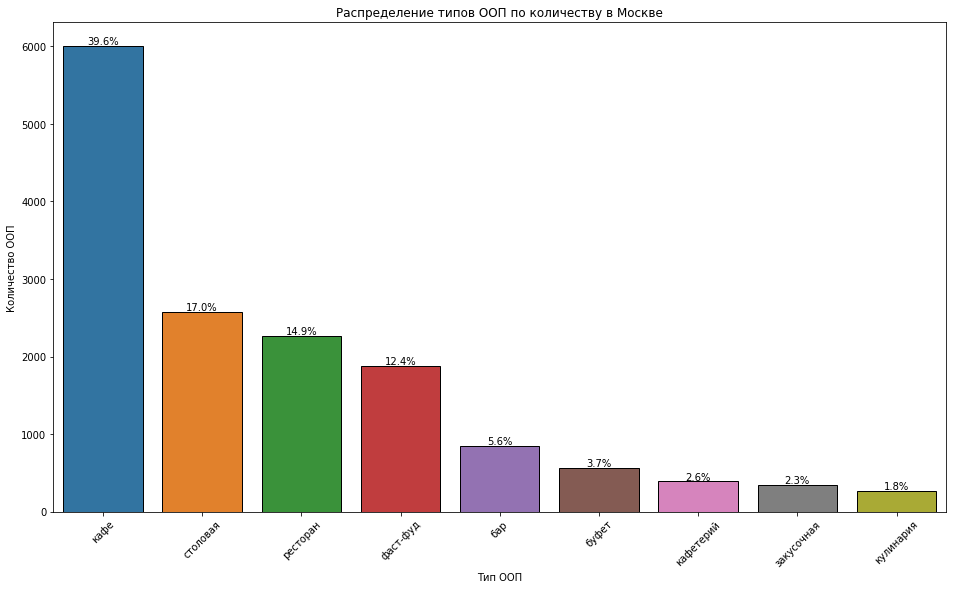

In [25]:
# Визуализируем полученные данные, применим Barplot() 
# у нас категориальные данные, а интерактивный график нельзя в полной мере использовать в презентации pdf
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="object_type", y="object_name", edgecolor="k", data=object_types.sort_values(by='object_name', ascending = False))
plt.title('Распределение типов ООП по количеству в Москве')
ax.set_xlabel('Тип ООП')
ax.set_ylabel('Количество ООП')
plt.xticks(rotation=45)

# укажем процентные значения над столбцами 
total = float(sum(object_types['object_name']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 20,
            '{:1.1f}%'.format(height/total*100),
            ha="center")
plt.show()

### 3.2. Количественное соотношение сетевых и несетевых ООП

In [26]:
# Для установления количества ООП по распространенности (сетевое/несетевое)
# сформируем таблицу с группировкой по типу распространения ООП
object_chain = df.groupby('chain', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
# добавим столбец с процентным соотношением типа распространения ООП к общему количеству ООП
object_chain['percent_object_chain'] = (object_chain['object_name']/object_chain['object_name'].sum()*100).round(1).astype('str') + '%'
object_chain

,chain,object_name,percent_object_chain
0,несетевой,12218,80.6%
1,сетевой,2941,19.4%


**80,6 % ООП Москвы - несетевые, и только 19,4 % имеют сетевое распространение.**

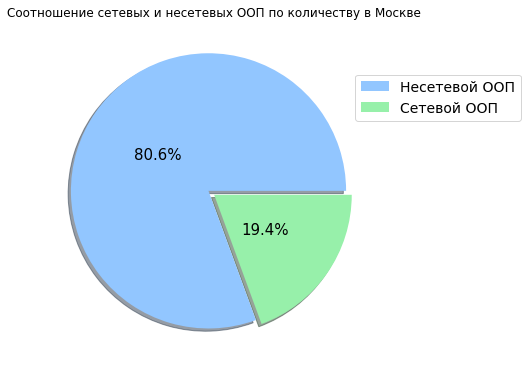

In [27]:
# Визуализируем полученные данные, построим круговую диаграмму 

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

ax_pie = object_chain.plot(kind='pie', y='object_name', fontsize=15, use_index=False, shadow=True, explode=explode,
                        title = 'Соотношение сетевых и несетевых ООП по количеству в Москве', pctdistance=0.45, figsize=(15,5), 
                        autopct='%1.1f%%', colors=['#92C6FF', '#97F0AA'], labels=None)

plt.tight_layout(pad=0)

legend = ax_pie.legend(['Несетевой ООП', 'Сетевой ООП'], bbox_to_anchor=(0.89,0.87), prop={'size':14})
y_label = ax_pie.set_ylabel('')

### 3.3. Тип ООП, характерный для сетевого распространения

In [28]:
# Подготовим данные: для установления количества каждого типа сетевого ООП
# сформируем таблицу с группировкой по типу ООП с фильтром "сетевой" 
chain_object_types = df[df['chain']=='сетевой'].groupby('object_type', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)

# объединим с полученным ранее датафреймом, чтобы получить столбец с общим количеством ООП каждого типа
chain_object_types = chain_object_types.merge(object_types[['object_type', 'object_name']], 
                                              left_on='object_type', right_on='object_type')
chain_object_types.columns=['object_type', 'chain_objects', 'all_objects']

# добавим столбец с процентным соотношением типа сетевого ООП к общему количеству сетевых ООП
chain_object_types['percent%'] = (chain_object_types['chain_objects'] / chain_object_types['chain_objects'].sum()*100).round(1).astype('str')+'%'

# добавим столбец с процентным соотношением типа сетевого ООП к общему количеству ООП этого типа
chain_object_types['percent_of_type'] = (chain_object_types['chain_objects'] / chain_object_types['all_objects']*100).round(2)
chain_object_types['percent_of_type%'] = chain_object_types['percent_of_type'].astype('str')+'%'
chain_object_types

,object_type,chain_objects,all_objects,percent%,percent_of_type,percent_of_type%
0,кафе,1387,6007,47.2%,23.09,23.09%
1,фаст-фуд,779,1884,26.5%,41.35,41.35%
2,ресторан,539,2266,18.3%,23.79,23.79%
3,кулинария,78,271,2.7%,28.78,28.78%
4,закусочная,56,346,1.9%,16.18,16.18%
5,кафетерий,51,391,1.7%,13.04,13.04%
6,бар,37,852,1.3%,4.34,4.34%
7,буфет,11,568,0.4%,1.94,1.94%
8,столовая,3,2574,0.1%,0.12,0.12%


**В ТОП-3 самых популярных типов сетевых ООП входят:**
- **Кафе**                                         - 47,2 % от общего количества сетевых ООП
- **Фаст- фуд** (предприятие быстрого обслуживания) - 26,5 %
- **Ресторан**                                     - 18,3 %

**Совокупная доля остальных типов сетевых ООП от общего количества сетевых ООП составляет 8 %**

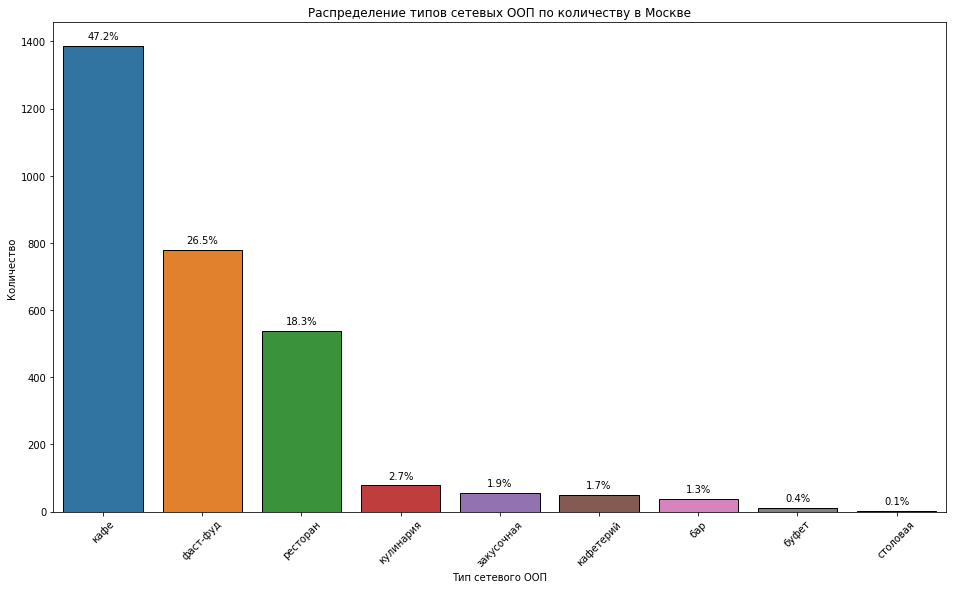

In [29]:
# Визуализируем полученные данные, применим Barplot() 
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="object_type", y="chain_objects", edgecolor="k", data=chain_object_types.sort_values(by='chain_objects', ascending = False))
plt.title('Распределение типов сетевых ООП по количеству в Москве')
ax.set_xlabel('Тип сетевого ООП')
ax.set_ylabel('Количество')
plt.xticks(rotation=45)

# укажем процентные значения над столбцами 
total = float(sum(chain_object_types['chain_objects']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 20,
            '{:1.1f}%'.format(height/total*100),
            ha="center")
plt.show()

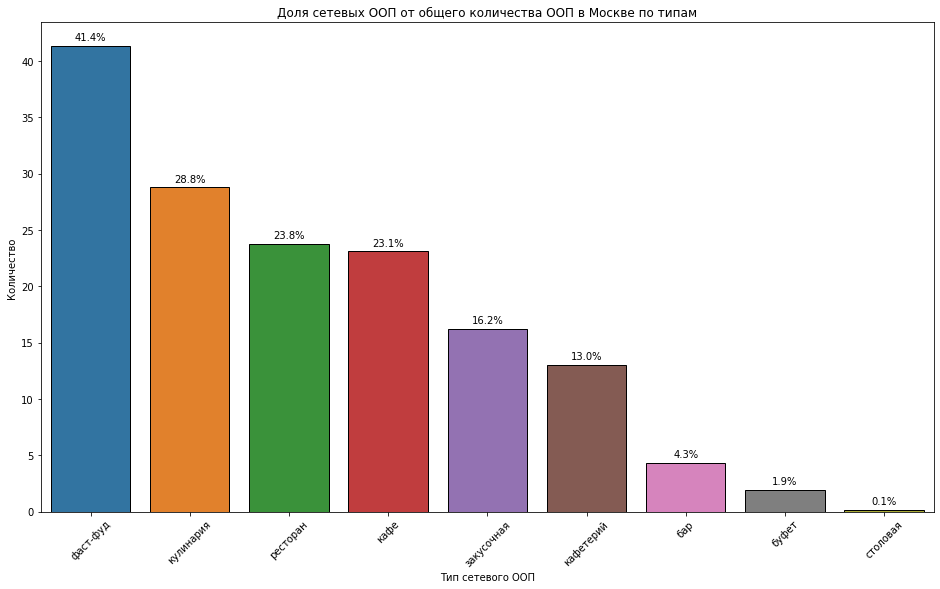

In [30]:
# Визуализируем полученные данные, посмотрим на долю сетевых ООП от общего количества ООП в Москве по типам
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="object_type", y="percent_of_type", edgecolor="k", data=chain_object_types.sort_values(by='percent_of_type', ascending = False))
plt.title('Доля сетевых ООП от общего количества ООП в Москве по типам')
ax.set_xlabel('Тип сетевого ООП')
ax.set_ylabel('Количество')
plt.xticks(rotation=45)

# укажем процентные значения над столбцами 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.5,
            '{:1.1f}%'.format(height),
            ha="center")
plt.show()

**Сетевое распространение в Москве характерно для следующих типов ООП:**
- **Фаст- фуд** (предприятие быстрого обслуживания) - 41,4 % от общего количества ООП "Фаст-фуд" в Москве
- **Кулинария**                                    - 28,8 % от общего количества отделов кулинарии в магазинах в Москве
- **Ресторан**                                     - 23,8 % от общего количества ресторанов в Москве
- **Кафе**                                         - 23,1 % от общего количества кафе в Москве
- **Закусочная**                                   - 16,2 % от общего количества закусочных в Москве

**Сетевое распространение в Москве практически не характерно для столовых (0,1 % всех столовых), буфетов (1,9 %) и баров (4,3 %).**

### 3.4. Число и вместимость ООП, характерных для сетевого распространения

In [31]:
# Подготовим данные: сформируем таблицу с группировкой по наименованию сетевого ООП
chain_objects = df[df['chain']=='сетевой'].groupby('object_name').agg({'object_name':'count', 'number':'median'})
chain_objects.columns = ['objects', 'median_number']
print(chain_objects.sort_values(by='median_number', ascending = False))
print(chain_objects.sort_values(by='objects', ascending = False))

                            objects  median_number
object_name                                       
Темпл Бар                         1          356.0
БАКИНСКИЙ БУЛЬВАР                 1          350.0
Чешская пивная «Козловица»        1          306.0
Ян Примус                         1          300.0
Кафе МУ-МУ                        1          300.0
...                             ...            ...
МагБургер                         1            0.0
МИЛТИ                             7            0.0
Ливан-Хаус                        1            0.0
Кофейня «Кофе Хаус»               1            0.0
Кофе с собой                     41            0.0

[724 rows x 2 columns]
                                            objects  median_number
object_name                                                       
KFC                                             152           46.5
Шоколадница                                     139           50.0
Бургер Кинг                                  

**В таблице представлены данные 724 сетей. Очевидно наличие сетей с одним заведением (возможно именно в Москве сеть представлена одним заведением, другие заведения сети находятся в других городах) и сетей без посадочных мест (кулинарии в сетевых магазинах и закусочные). Учитывая, что подробный анализ наименований ООП и типа распространения "сетевой" не проводился, можно предположить, что в ряд сетевых заведений попали при группировке не все их ООП из-за некорректных наименований. Однако имеющиеся в нашем распоряжении открытые данные могут дать нам общее представление для ответа на поставленные вопросы проекта. Учитывая, что по исходным данным можно охарактеризовать только общие тенденции развития рынка общественного питания Москвы, а также ограниченные временные ресурсы, проводить дополнительную обработку данных не рационально.**

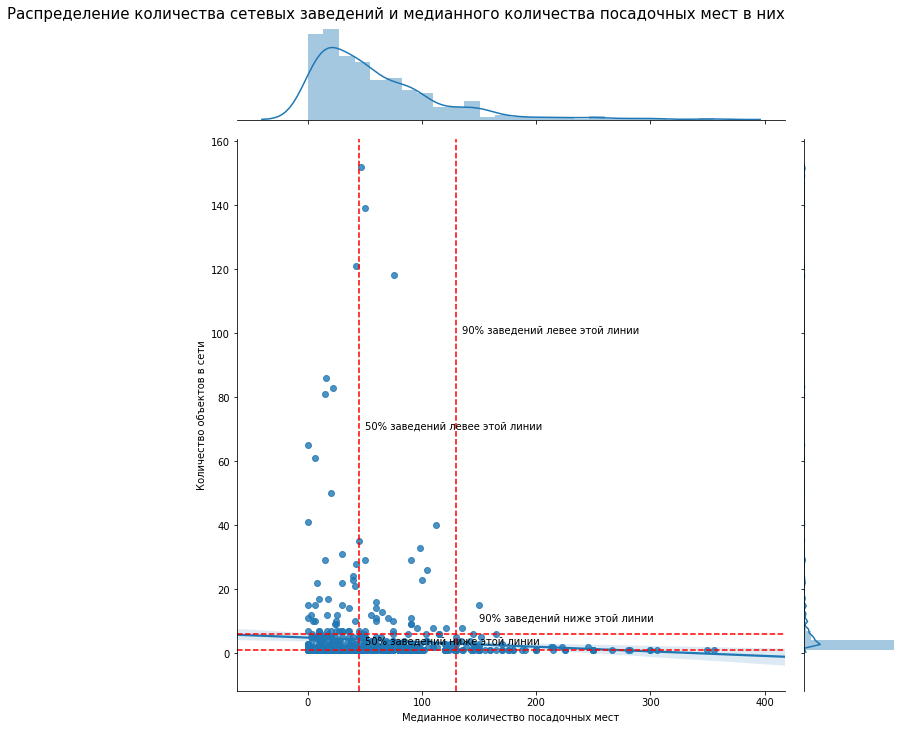

In [32]:
# Визуализируем полученные данные

ax = sns.jointplot(x='median_number', y='objects', data=chain_objects, kind='reg', height=10)
plt.xlabel('Медианное количество посадочных мест')
plt.ylabel('Количество объектов в сети')
plt.title('Распределение количества сетевых заведений и медианного количества посадочных мест в них', loc = 'right',
                pad = 120 , fontsize=15)
plt.axhline(np.percentile(chain_objects['objects'], 90), linestyle='--', color='red')
plt.axvline(np.percentile(chain_objects['median_number'], 90), linestyle='--', color='red')
plt.text(150,10, '90% заведений ниже этой линии')
plt.text(135,100, '90% заведений левее этой линии')
plt.axhline(np.percentile(chain_objects['objects'], 50), linestyle='--', color='red')
plt.axvline(np.percentile(chain_objects['median_number'], 50), linestyle='--', color='red')
plt.text(50,3, '50% заведений ниже этой линии')
plt.text(50,70, '50% заведений левее этой линии')
plt.show()

In [33]:
print('От 90 до 95% сетей имеют не больше {} посадочных мест и {} заведений в среднем'.format(int(np.percentile(chain_objects['median_number'], 95)) , int(np.percentile(chain_objects['objects'], 95))))

От 90 до 95% сетей имеют не больше 154 посадочных мест и 12 заведений в среднем


**Регрессия на графике проходит ниже 95% сетевых ООП, начинается от 90% по количеству ООП (6) и спускается до 0, имеется заметное число выбросов - сетей с количеством ООП примерно до 150.  Медианное количество мест по линии регрессии растет от 0 до 350.**

**Около 50% сетевых ООП имеет только одно заведение с вместимостью по медиане до 45.**

**Чем больше медианное число посадочных мест, тем меньше количество сетевых ООП с таким числом мест.**

**Ниже выведено среднее число ООП в сети и медианное число посадочных мест в них, на отметках 50 и 90 % - малое число заведений в сети и довольно большое число посадочных мест в них.**

In [34]:
print('От 50 до 90% сетей имеют не больше {} посадочных мест и {} заведений в среднем'.format(int(np.percentile(chain_objects['median_number'], 90)) , int(np.percentile(chain_objects['objects'], 90))))

От 50 до 90% сетей имеют не больше 130 посадочных мест и 6 заведений в среднем


In [35]:
print('До 50% сетей имеют не больше {} посадочных мест и {} заведение в среднем'.format(int(np.percentile(chain_objects['median_number'], 50)) , int(np.percentile(chain_objects['objects'], 50))))

До 50% сетей имеют не больше 45 посадочных мест и 1 заведение в среднем


### 3.5. Средняя вместимость для каждого типа ООП

In [36]:
# Подготовим данные: для установления средней вместимости каждого типа сетевого ООП
# сформируем таблицу с группировкой по типу ООП
object_types_1 = df.groupby('object_type', as_index=False).agg({'object_name':'count', 'number':'median'}).sort_values(by='number', ascending=False)
object_types_1.columns = ['object_type', 'objects', 'median_number']
object_types_1                                                                                                                           

,object_type,objects,median_number
7,столовая,2574,103
6,ресторан,2266,80
0,бар,852,35
1,буфет,568,32
3,кафе,6007,31
4,кафетерий,391,6
8,фаст-фуд,1884,6
2,закусочная,346,0
5,кулинария,271,0


In [37]:
df.groupby('object_type')['number'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2574.0,130.365190,95.273160,0.0,52.0,103.0,200.0,1400.0
ресторан,2266.0,97.206090,95.003722,0.0,47.0,80.0,115.0,1500.0
буфет,568.0,51.540493,56.462175,0.0,14.0,32.0,80.0,320.0
бар,852.0,43.600939,67.215163,0.0,20.0,35.0,50.0,1700.0
кафе,6007.0,39.834193,37.752813,0.0,15.0,31.0,50.0,533.0
фаст-фуд,1884.0,20.771762,38.597710,0.0,0.0,6.0,25.0,580.0
кафетерий,391.0,9.168798,14.679207,0.0,0.0,6.0,12.0,200.0
закусочная,346.0,7.037572,12.302057,0.0,0.0,0.0,10.0,91.0
кулинария,271.0,5.616236,9.902878,0.0,0.0,0.0,8.0,50.0


**Распределение медианной вместимости разных типов ООП (ТОП-5 по вместимости):**
- **Столовая** - 103 посадочных места
- **Ресторан** - 80 посадочных мест
- **Бар**      - 35 посадочных мест
- **Буфет**    - 32 посадочных места
- **Кафе**     - 31 посадочное место

**Средняя вместимость отличается по значениям от медианной, однако порядок ТОП-5 по вместимости практически такой же, за исключением взаимной смены позиций у типов бар/буфет.**

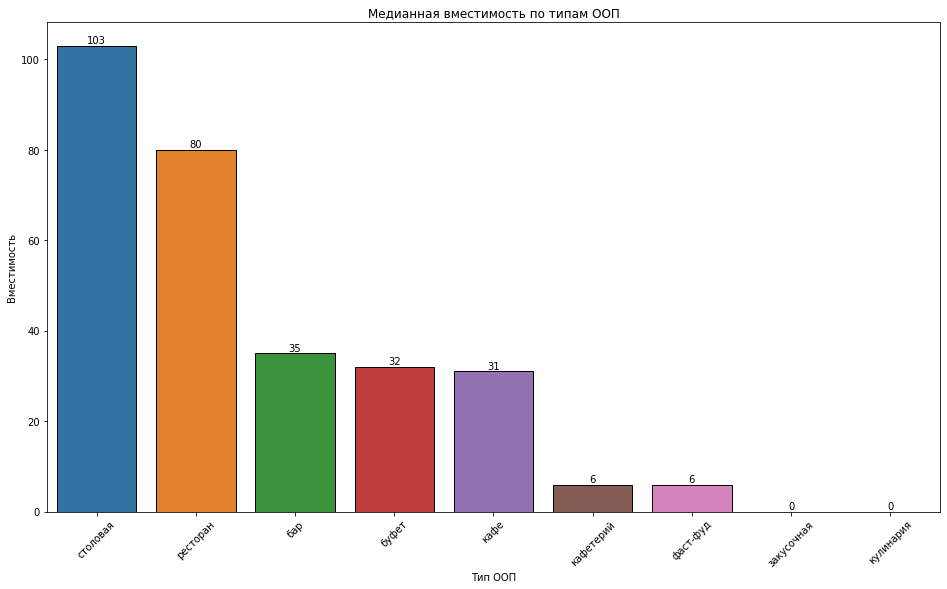

In [38]:
# Визуализируем полученные данные, посмотрим на распределение вместимости по типам ООП
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="object_type", y="median_number", edgecolor="k", data=object_types_1.sort_values(by='median_number', ascending = False))
plt.title('Медианная вместимость по типам ООП')
ax.set_xlabel('Тип ООП')
ax.set_ylabel('Вместимость')
plt.xticks(rotation=45)

# укажем значения над столбцами 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.5,
            '{:1.0f}'.format(height),
            ha="center")
plt.show()

### 3.6. Топ-10 улиц по количеству расположеных ООП

In [39]:
# Выделим в отдельный столбец улицу из адреса
street_types = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека']
def street_find(address):
    for address_part in address.split(', '):
        for street_type in street_types:
            if address_part.lower().find(street_type)!= -1:
                return address_part

df['street'] = df['address'].apply(street_find)

# Посчитаем число строк полученных улиц (всего в df 15159)
print(len(df['street']))

# Проверим наличие пропусков
print(df['street'].isna().sum())

# Посмотрим на пропуски
display(df[df['street'].isna()].sample(n=10, random_state=0))

15159
377


,id,object_name,chain,object_type,address,number,street
12797,198136,Кафе белла Италия,несетевой,кафе,"город Москва, 87-й километр Московской Кольцевой Автодороги, дом 8",10,None
8533,79930,Мастер отель Внуково,несетевой,кафе,"город Москва, поселение Внуковское, деревня Внуково, дом 155",20,None
14795,221526,PivBar,несетевой,бар,"город Москва, город Московский, 1-й микрорайон, владение 5Д, строение 1",10,None
10071,171729,Larionov Grill & Bar,несетевой,ресторан,"город Москва, город Московский, 3-й микрорайон, дом 21",120,None
11605,187190,Ресторан «Леман»,несетевой,ресторан,"город Москва, микрорайон Северное Чертаново, дом 4",45,None
11783,186427,Шаурма № 1,несетевой,кулинария,"город Москва, город Московский, 1-й микрорайон, владение 5Д, строение 1",0,None
12501,200334,BBQ AM Барбекю,несетевой,фаст-фуд,"город Москва, поселение Московский, деревня Говорово, дом 1Б/Н",20,None
11739,188583,Ош Кафе,несетевой,кафе,"город Москва, поселение Московский, деревня Саларьево, владение 3, строение 1",10,None
5554,23249,Метро К&К,сетевой,кафе,"город Москва, 104-й километр Московской Кольцевой Автодороги, дом 6",80,None
2424,84460,Столова «ГБОУ Школа №852»,несетевой,столовая,"город Москва, город Зеленоград, корпус 1128",160,None


In [40]:
# Как видно в таблице выше, не удалось выделить улицу из адресов пригородных поселений Москвы, г. Зеленограда
# учитывая, что нас интересует непосредственно Москва, удалим 377 строк, далее будем использовать только улицы Москвы
df_streets = df[~(df['street'].isnull())]
print(df_streets['street'].isna().sum())

0


In [41]:
# В отдельную таблицу выделим улицы с числом ООП, расположенных на них
top_streets = df_streets.groupby('street', as_index=False).agg({'object_name':'count'})
top_streets.columns = ['street', 'objects']
top_streets = top_streets.sort_values(by='objects', ascending = False)
top10_streets = top_streets.head(10)
print('Топ-10 улиц с наибольшим количеством ООП:\n', top10_streets)

Топ-10 улиц с наибольшим количеством ООП:
                       street  objects
1426           проспект Мира      197
1014       Профсоюзная улица      180
686   Ленинградский проспект      171
997   Пресненская набережная      165
399         Варшавское шоссе      164
689       Ленинский проспект      148
1422    проспект Вернадского      127
676     Кутузовский проспект      112
599          Каширское шоссе      110
606     Кировоградская улица      106


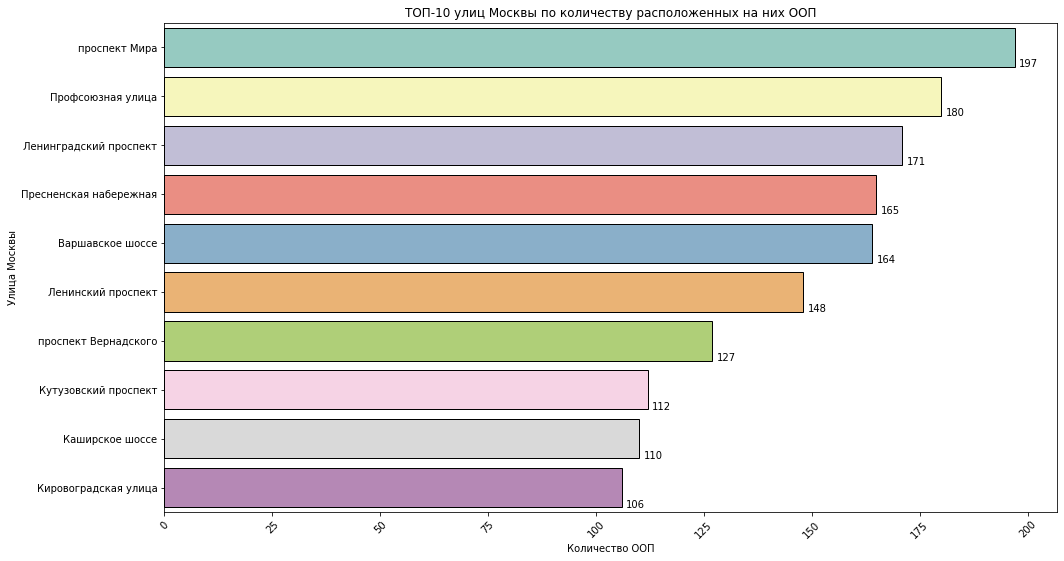

In [42]:
# Визуализируем полученные данные
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="objects", y="street", edgecolor="k",  palette="Set3", data=top10_streets) 
plt.title('ТОП-10 улиц Москвы по количеству расположенных на них ООП')
ax.set_xlabel('Количество ООП')
ax.set_ylabel('Улица Москвы')
plt.xticks(rotation=45)

# укажем значения над столбцами 

for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(1)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")
plt.show()

In [43]:
# С сайта https://hubofdata.ru/dataset/mosgaz-contacts скачаем датасет с данными об улицах и районах Москвы,
# загрузим и прочитаем его

#https://docs.google.com/spreadsheets/d/1pj9aDTcEgmST14KnYjhdrZNkAN2IWbp3T6hkhO5Muqo/edit?usp=sharing

spreadsheet_id = '1pj9aDTcEgmST14KnYjhdrZNkAN2IWbp3T6hkhO5Muqo'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_1 = pd.read_csv(BytesIO(r.content))

# Переименуем столбцы для удобства
df_1.columns = ['street', 'areaid', 'okrug', 'area']
df_1.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [44]:
# Объединим таблицы, посмотрим, в каких районах находится ТОП-10 улиц по количеству ООП
top10_streets_merge = top10_streets.merge(df_1[['street', 'okrug', 'area']], on='street')
top10_streets_merge.columns = ['Улица Москвы', 'Количество ООП', 'Округ Москвы', 'Район Москвы']
display(top10_streets_merge)

,Улица Москвы,Количество ООП,Округ Москвы,Район Москвы
0,проспект Мира,197,СВАО,Алексеевский район
1,проспект Мира,197,СВАО,Ярославский Район
2,проспект Мира,197,СВАО,Район Марьина роща
3,проспект Мира,197,СВАО,Останкинский район
4,проспект Мира,197,СВАО,Район Ростокино
5,проспект Мира,197,СВАО,Район Свиблово
6,проспект Мира,197,ЦАО,Мещанский район
7,Профсоюзная улица,180,ЮЗАО,Академический район
8,Профсоюзная улица,180,ЮЗАО,Район Черемушки
9,Профсоюзная улица,180,ЮЗАО,Район Ясенево


In [45]:
top10_streets_merge['Округ Москвы'].value_counts()

ЮАО     14
ЮЗАО    14
ЗАО      7
СВАО     6
САО      4
ЦАО      3
Name: Округ Москвы, dtype: int64

In [46]:
# Практически все улицы проходят через несколько районов
# Для удобства просмотра в презентации оставим только первый район для каждой улицы
top10_streets_merge_pivot = top10_streets_merge.pivot_table(index = 'Улица Москвы', values = ['Количество ООП', 'Округ Москвы', 'Район Москвы'], aggfunc = 'first')

top10_streets_merge_pivot.sort_values(by='Количество ООП', ascending = False)

,Количество ООП,Округ Москвы,Район Москвы
Улица Москвы,,,
проспект Мира,197,СВАО,Алексеевский район
Профсоюзная улица,180,ЮЗАО,Академический район
Ленинградский проспект,171,САО,Район Аэропорт
Пресненская набережная,165,ЦАО,Пресненский район
Варшавское шоссе,164,ЮАО,Район Чертаново Центральное
Ленинский проспект,148,ЗАО,Район Проспект Вернадского
проспект Вернадского,127,ЗАО,Район Проспект Вернадского
Кутузовский проспект,112,ЗАО,Район Дорогомилово
Каширское шоссе,110,ЮАО,Район Москворечье-Сабурово


**Большое количество ООП в Москве располагается, вероятно, на самых длинных и крупных улицах (проспектах), проходящих через несколько районов, а также на улицах с бизнес- центрами, зонами отдыха и туристическими маршрутами. Большинство ТОП-10 улиц находится в ЮАО, ЮЗАО и ЗАО.**

### 3.7. Улицы и районы Москвы с одним ООП

In [47]:
# В отдельную таблицу выделим улицы с одним ООП, расположенных на них
top_streets_1 = top_streets.query('objects == 1')

print(top_streets_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 264 to 952
Data columns (total 2 columns):
street     552 non-null object
objects    552 non-null int64
dtypes: int64(1), object(1)
memory usage: 12.9+ KB
None


In [48]:
# Выведем число улиц с одним ООП, расположенных на них
print('Всего в Москве {} улицы с 1 ООП, что составляет {:.1%} от общего количества улиц Москвы с ООП.'\
      .format(len(top_streets_1), (len(top_streets_1)/len(top_streets))))

Всего в Москве 552 улицы с 1 ООП, что составляет 29.0% от общего количества улиц Москвы с ООП.


In [49]:
# Объединим таблицы, посмотрим, в каких районах находятся улицы с 1 ООП
top_streets_1_merge = top_streets_1.merge(df_1[['street', 'okrug', 'area']], on='street')
top_streets_1_merge.columns = ['Улица Москвы', 'Количество ООП', 'Округ Москвы', 'Район Москвы']
# Для удобства просмотра в презентации оставим только первый район для каждой улицы
top_streets_1_merge = top_streets_1_merge.pivot_table(index = 'Улица Москвы', values = ['Количество ООП', 'Округ Москвы', 'Район Москвы'], aggfunc = 'first')

display(top_streets_1_merge.sample(n=10, random_state=0))

,Количество ООП,Округ Москвы,Район Москвы
Улица Москвы,,,
Кооперативная улица,1,ЦАО,Район Хамовники
улица Академика Комарова,1,СВАО,Район Марфино
Спартаковский переулок,1,ЦАО,Басманный район
Лонгиновская улица,1,ЮВАО,Район Лефортово
Гольяновская улица,1,ЦАО,Басманный район
1-й Монетчиковский переулок,1,ЦАО,Район Замоскворечье
Газгольдерная улица,1,ЮВАО,Нижегородский район
улица Павла Андреева,1,ЦАО,Район Замоскворечье
Успенский переулок,1,ЦАО,Тверской район


In [50]:
top_streets_1_merge['Округ Москвы'].value_counts()

ЦАО           172
СВАО           64
ВАО            59
ЮВАО           50
САО            50
ЗАО            45
СЗАО           25
ЮЗАО           24
ЮАО            24
Зеленоград      4
Name: Округ Москвы, dtype: int64

**Вероятно, единственный ООП на улицу находится в Москве либо на маленьких улочках и переулках, либо на улицах спальных районов и окраины Москвы. Большинство улиц с единственным ООП располагается в ЦАО.**

### 3.8. Вместимость ООП на улицах с большим количеством ООП

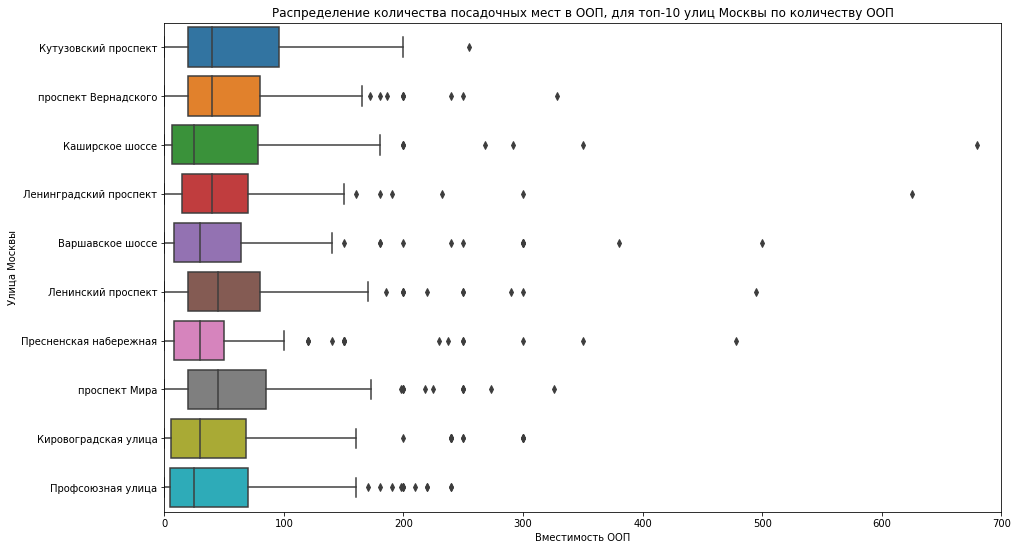

In [51]:
# Переведем ТОП-10 в строку, сделаем срез данных из датафрейма с улицами
top10_streets_list = top10_streets['street'].to_list()
top10_streets_data = df_streets.query('street in @top10_streets_list')

# Посчитаем медианную вместимость
top10_streets_data['number'].median()

# Визуализируем данные, построим "ящики с усами"
plt.figure(figsize=(15,9))
plt.xlim(0,700)
sns.boxplot(x='number', y='street', data=top10_streets_data.sort_values(by='number', ascending = False))
plt.title('Распределение количества посадочных мест в ООП, для топ-10 улиц Москвы по количеству ООП')
plt.ylabel('Улица Москвы')
plt.xlabel('Вместимость ООП')
plt.show()

**Диаграммы размаха показывают, что в пределах нормы для большинства ООП на ТОП-10 улицах Москвы характерно от 0 до 150 посадочных мест. На всех ТОП-10 улицах имеются ООП с количеством посадочных мест до 300 и более (на Каширском шоссе максимально вместительный ООП - около 700 посадочных мест),**

In [52]:
# Сгруппируем таблицу с ТОП-10 улиц по количеству ООП, с медианным значением вместимости
top_streets_number = df_streets.groupby('street', as_index=False).agg({'object_name':'count', 'number':'median'}).sort_values(by='object_name', ascending=False)
top_streets_number.columns = ['street', 'objects', 'median_number']
top10_top_streets_number = top_streets_number.head(10)
top10_top_streets_number

,street,objects,median_number
1426,проспект Мира,197,45.0
1014,Профсоюзная улица,180,24.5
686,Ленинградский проспект,171,40.0
997,Пресненская набережная,165,30.0
399,Варшавское шоссе,164,30.0
689,Ленинский проспект,148,45.0
1422,проспект Вернадского,127,40.0
676,Кутузовский проспект,112,40.0
599,Каширское шоссе,110,25.0
606,Кировоградская улица,106,30.0


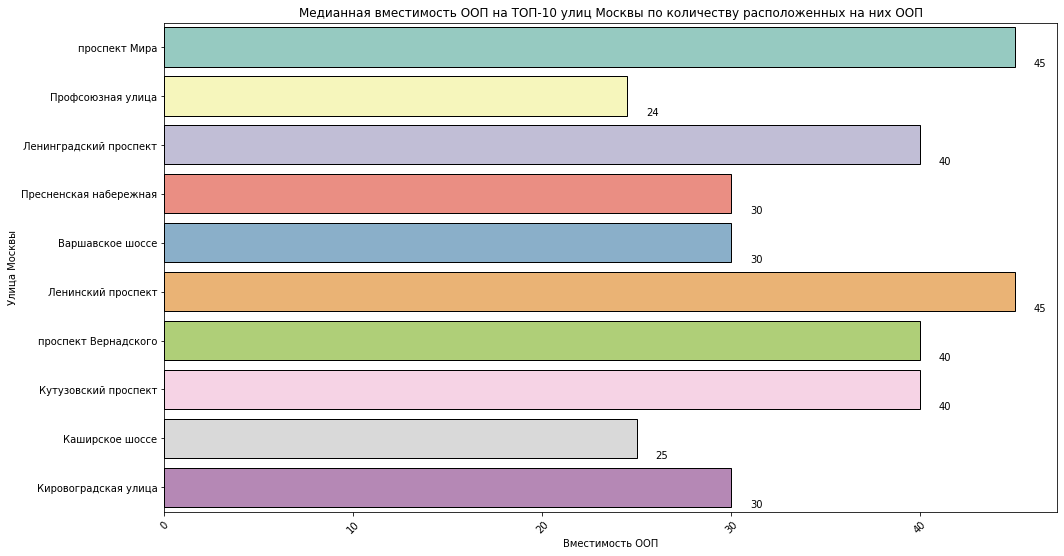

In [53]:
# Визуализируем полученные данные
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="median_number", y="street", edgecolor="k",  palette="Set3", data=top10_top_streets_number) 
plt.title('Медианная вместимость ООП на ТОП-10 улиц Москвы по количеству расположенных на них ООП')
ax.set_xlabel('Вместимость ООП')
ax.set_ylabel('Улица Москвы')
plt.xticks(rotation=45)

# укажем значения над столбцами 

for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(1)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")
plt.show()

**Медианная вместимость ООП на ТОП-10 улиц Москвы колеблется от 24 до 45 посадочных мест.**

In [54]:
print('Медианное количество посадочных мест в ООП на ТОП-10 улиц Москвы по количеству ООП: {}'.format(top10_streets_data['number'].median()))
print('Медианное количество посадочных мест в ООП на остальных улицах Москвы: {}'\
.format(df.query('street not in @top10_streets_list')['number'].median()))

Медианное количество посадочных мест в ООП на ТОП-10 улиц Москвы по количеству ООП: 38.5
Медианное количество посадочных мест в ООП на остальных улицах Москвы: 40.0


### 4. Общий вывод

**По итогам анализа открытых данных об объектах общественного питания Москвы (далее - ООП), получены следующие результаты, характеризующие общее состояние рынка общественного питания.**

**Популярные (наиболее распространенные) типы ООП:**
- кафе (39,6 % ООП), 
- на втором месте - столовая (17 %), 
- на третьем - ресторан (14,9 %). 

**Наименее распространенные типы ООП:**
- отдел кулинарии в магазине (1,8 %), 
- закусочная (2,3 %), 
- кафетерий (2,6 %).

***80,6 % ООП Москвы - несетевые, и только 19,4 % имеют сетевое распространение.***

**В ТОП-3 самых популярных типов сетевых ООП входят:**
- Кафе - 47,2 % от общего количества сетевых ООП,
- Фаст- фуд (предприятие быстрого обслуживания) - 26,5 %,
- Ресторан - 18,3 %,
*Совокупная доля остальных типов сетевых ООП от общего количества сетевых ООП составляет 8 %.*


**Сетевое распространение в Москве характерно для следующих типов ООП:**
- Фаст- фуд (предприятие быстрого обслуживания) - 41,4 % от общего количества ООП "Фаст-фуд" в Москве,
- Кулинария - 28,8 % от общего количества отделов кулинарии в магазинах в Москве,
- Ресторан - 23,8 % от общего количества ресторанов в Москве,
- Кафе - 23,1 % от общего количества кафе в Москве,
- Закусочная - 16,2 % от общего количества закусочных в Москве.
*Сетевое распространение в Москве практически не характерно для столовых (0,1 % всех столовых), буфетов (1,9 %) и баров (4,3 %).*

**Для сетевых ООП характерно малое число заведений в сети и довольно большое число посадочных мест в них.**

- До 50% сетей имеют не больше 45 посадочных мест и 1 заведение в среднем.
- От 50 до 90% сетей имеют не больше 130 посадочных мест и 6 заведений в среднем.
- От 90 до 95% сетей имеют не больше 154 посадочных мест и 12 заведений в среднем.

**Распределение медианной вместимости разных типов ООП (ТОП-5 по вместимости):**
- Столовая - 103 посадочных места,
- Ресторан - 80 посадочных мест,
- Бар - 35 посадочных мест,
- Буфет - 32 посадочных места,
- Кафе - 31 посадочное место.

**Топ-10 улиц с наибольшим количеством ООП:**
                       
- проспект Мира          - 197
- Профсоюзная улица      - 180
- Ленинградский проспект - 171
- Пресненская набережная - 165
- Варшавское шоссе       - 164
- Ленинский проспект     - 148
- проспект Вернадского   - 127
- Кутузовский проспект   - 112
- Каширское шоссе        - 110
- Кировоградская улица   - 106
*Наибольшее количество ООП в Москве располагается на длинных и крупных улицах (проспектах), проходящих через несколько районов, а также на улицах с бизнес- центрами, зонами отдыха и туристическими маршрутами.* 
***Большинство ТОП-10 улиц находится в ЮАО, ЮЗАО и ЗАО.***

**Для большинства ООП на ТОП-10 улицах Москвы характерно от 0 до 150 посадочных мест.** ***На всех ТОП-10 улицах имеются ООП с количеством посадочных мест до 300 и более (на Каширском шоссе максимально вместительный ООП - около 700 посадочных мест).***

- Медианное количество посадочных мест в ООП на ТОП-10 улиц Москвы по количеству ООП: 38.5
- Медианное количество посадочных мест в ООП на остальных улицах Москвы: 40.0


**Всего в Москве 552 улицы с одним ООП, что составляет 29.0% от общего количества улиц Москвы с ООП.**

**Вероятно, один ООП находится в Москве либо на маленьких улочках и переулках, либо на улицах спальных районов и окраины Москвы.**

***Большинство улиц с единственным ООП располагается в ЦАО.***

**РЕКОМЕНДАЦИИ:**
- Тип ООП **кафе** - самый распространенный (почти 40 % от общего количества ООП), с одной стороны - высокая конкуренция, с другой стороны - спрос рождает предложение, кафе - оптимальный тип для открытия небольшого ООП.
- Оптимальное **число посадочных мест** в кафе - **от 30 до 40.**
- Оптимальное место для расположения - самые "проходимые" улицы - с расположенными на них , или поблизости, бизнес и торговыми центрами, зонами отдыха, престижными учреждениями высшего профессионального образования, туристическими маршрутами. Выбор конкретного района довольно обширен, **предпочтительнее выбрать улицу в самых популярных округах - ЮАО, ЮЗАО и ЗАО.**
- При условии привлечения в качестве посетителей в первую очередь молодого поколения (как наиболее лояльного к тенденции всеобщей информатизации, что важно для робототизированного кафе), эффективной реализации бизнес- проекта по основным метрикам (санитарные нормы, меню, соотношение цена/качество) существуют реальные перспективы для сетевого развития. Нынешняя ситуация на рынке общественного питания демонстрирует тенденцию сетевого развития именно для кафе (47 % от общего количества сетевых ООП), в тоже время - только 23 % всех кафе Москвы относятся к сетевым.

### 5. Презентация

**Презентация:** https://yadi.sk/i/rVaJmDrDFtVKGw